In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={"figure.figsize":(30,15)})
pd.pandas.set_option("display.max_columns",None)

In [2]:
df = pd.read_json("D:/ml_assignment_code/ml_assignment_code/data/News_Category_Dataset_v3.json", lines=True)
df_copy = df.copy()

In [3]:
df_copy

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22
...,...,...,...,...,...,...
209522,https://www.huffingtonpost.com/entry/rim-ceo-t...,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,TECH,Verizon Wireless and AT&T are already promotin...,"Reuters, Reuters",2012-01-28
209523,https://www.huffingtonpost.com/entry/maria-sha...,Maria Sharapova Stunned By Victoria Azarenka I...,SPORTS,"Afterward, Azarenka, more effusive with the pr...",,2012-01-28
209524,https://www.huffingtonpost.com/entry/super-bow...,"Giants Over Patriots, Jets Over Colts Among M...",SPORTS,"Leading up to Super Bowl XLVI, the most talked...",,2012-01-28
209525,https://www.huffingtonpost.com/entry/aldon-smi...,Aldon Smith Arrested: 49ers Linebacker Busted ...,SPORTS,CORRECTION: An earlier version of this story i...,,2012-01-28


In [4]:
df_feature = df_copy.sample(frac=0.1, random_state=42)

In [5]:
df_feature.shape

(20953, 6)

In [6]:
df_feature.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20953 entries, 128310 to 423
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   link               20953 non-null  object        
 1   headline           20953 non-null  object        
 2   category           20953 non-null  object        
 3   short_description  20953 non-null  object        
 4   authors            20953 non-null  object        
 5   date               20953 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(5)
memory usage: 1.1+ MB


In [7]:
df_feature.shape

(20953, 6)

In [8]:
df_feature['category'].unique()

array(['IMPACT', 'BUSINESS', 'POLITICS', 'GREEN', 'SCIENCE', 'PARENTING',
       'WELLNESS', 'STYLE & BEAUTY', 'QUEER VOICES', 'EDUCATION',
       'BLACK VOICES', 'TRAVEL', 'DIVORCE', 'HEALTHY LIVING', 'TASTE',
       'THE WORLDPOST', 'COMEDY', 'WORLDPOST', 'ENTERTAINMENT', 'STYLE',
       'FOOD & DRINK', 'HOME & LIVING', 'GOOD NEWS', 'MEDIA', 'SPORTS',
       'CRIME', 'MONEY', 'WORLD NEWS', 'COLLEGE', 'RELIGION', 'WOMEN',
       'PARENTS', 'ARTS', 'ARTS & CULTURE', 'ENVIRONMENT', 'WEDDINGS',
       'U.S. NEWS', 'TECH', 'LATINO VOICES', 'WEIRD NEWS',
       'CULTURE & ARTS', 'FIFTY'], dtype=object)

In [9]:
df_feature.isnull().sum()

link                 0
headline             0
category             0
short_description    0
authors              0
date                 0
dtype: int64

In [10]:
df_feature['authors'].unique()

array(['Matt Murrie, ContributorEdupreneur, Cofounder/Chief Curiosity Curator of What If...?',
       '', 'Michael McLaughlin & Josh Morgan, The Huffington Post', ...,
       'Adelle M. Banks, Religion News Service',
       'Trip.com, ContributorTrip.com makes adventure less work and more fun',
       'Rebecca Rovenstine'], dtype=object)

In [11]:
import re
import string

def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove punctuation
    text = text.translate(str.maketrans("", "", string.punctuation))
    
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    
    # Remove extra whitespaces
    text = re.sub(r'\s+', ' ', text).strip()
    
    # Apply any additional preprocessing steps as needed
    
    return text

In [12]:
df_feature['headline'] = df_feature['headline'].apply(preprocess_text)

In [13]:
df_feature['short_description'] = df_feature['short_description'].apply(preprocess_text)

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [15]:
vectorizer = TfidfVectorizer()

vectorizer.fit(df_feature['headline'])

# Transform the data
features = vectorizer.transform(df_feature['headline'])
df_feature['headline'] = features.toarray()

In [16]:
vectorizer = TfidfVectorizer()

vectorizer.fit(df_feature['short_description'])

# Transform the data
features = vectorizer.transform(df_feature['short_description'])
df_feature['short_description'] = features.toarray()

In [17]:
df_feature.head()

,link,headline,category,short_description,authors,date
128310,https://www.huffingtonpost.com/entry/what-if-w...,0.0,IMPACT,0.0,"Matt Murrie, ContributorEdupreneur, Cofounder/...",2014-06-20
139983,https://www.huffingtonpost.comhttp://www.washi...,0.0,BUSINESS,0.0,,2014-02-08
42339,https://www.huffingtonpost.com/entry/time-runs...,0.0,POLITICS,0.0,"Michael McLaughlin & Josh Morgan, The Huffingt...",2017-02-22
131494,https://www.huffingtonpost.com/entry/one-glimp...,0.0,GREEN,0.0,,2014-05-14
163649,https://www.huffingtonpost.com/entry/mens-swea...,0.0,SCIENCE,0.0,Melissa Cronin,2013-06-02


In [18]:
from urllib.parse import urlparse

In [19]:
df_feature['Domain'] = df_feature['link'].apply(lambda x: urlparse(x).netloc)
df_feature['Path'] = df_feature['link'].apply(lambda x: urlparse(x).path)

In [20]:
df_feature['Domain'].unique()

array(['www.huffingtonpost.com', 'www.huffingtonpost.comhttp:',
       'www.huffpost.com', 'www.huffingtonpost.comhttps:'], dtype=object)

In [21]:
df_feature['Path'].unique()

array(['/entry/what-if-we-were-all-famil_b_5510958.html',
       '//www.washingtonpost.com/business/economy/aol-chief-ignites-firestorm-over-401k-cuts-and-distressed-babies-remark/2014/02/07/2116c03a-9012-11e3-b227-12a45d109e03_story.html',
       '/entry/time-runs-out-at-main-dakota-access-pipeline-protest-camp_us_58acc6a9e4b04a0b274df548',
       ...,
       '/entry/dennis-adams-wife-nude-photos_us_5683fc63e4b0b958f65ae583',
       '/entry/cooking-off-the-cuff-a-free-form-apple-pie_us_5b9db04ae4b03a1dcc8b839f',
       '/entry/jello-skin-tiktok_l_62b5bc22e4b04a6173695b03'],
      dtype=object)

In [22]:
len(df_feature['Path'].unique())

20952

In [23]:
df_feature.drop('link',axis=1,inplace=True)

In [24]:
df_feature['Path'] = df_feature['Path'].apply(preprocess_text)

In [25]:
df_feature.head()

,headline,category,short_description,authors,date,Domain,Path
128310,0.0,IMPACT,0.0,"Matt Murrie, ContributorEdupreneur, Cofounder/...",2014-06-20,www.huffingtonpost.com,entrywhatifwewereallfamilbhtml
139983,0.0,BUSINESS,0.0,,2014-02-08,www.huffingtonpost.comhttp:,wwwwashingtonpostcombusinesseconomyaolchiefign...
42339,0.0,POLITICS,0.0,"Michael McLaughlin & Josh Morgan, The Huffingt...",2017-02-22,www.huffingtonpost.com,entrytimerunsoutatmaindakotaaccesspipelineprot...
131494,0.0,GREEN,0.0,,2014-05-14,www.huffingtonpost.com,entryoneglimpseofthesebabynhtml
163649,0.0,SCIENCE,0.0,Melissa Cronin,2013-06-02,www.huffingtonpost.com,entrymenssweatpheromonecooperationusbaebfebeeae


In [26]:
df_feature['Path'].unique()

array(['entrywhatifwewereallfamilbhtml',
       'wwwwashingtonpostcombusinesseconomyaolchiefignitesfirestormoverkcutsanddistressedbabiesremarkcaebadestoryhtml',
       'entrytimerunsoutatmaindakotaaccesspipelineprotestcampusaccaebabdf',
       ..., 'entrydennisadamswifenudephotosusfcebbfae',
       'entrycookingoffthecuffafreeformapplepieusbdbaebadccbf',
       'entryjelloskintiktoklbbcebab'], dtype=object)

In [27]:
df_feature['authors'].unique()

array(['Matt Murrie, ContributorEdupreneur, Cofounder/Chief Curiosity Curator of What If...?',
       '', 'Michael McLaughlin & Josh Morgan, The Huffington Post', ...,
       'Adelle M. Banks, Religion News Service',
       'Trip.com, ContributorTrip.com makes adventure less work and more fun',
       'Rebecca Rovenstine'], dtype=object)

In [28]:
len(df_feature['authors'].unique())

6162

In [29]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the data
df_feature['authors'] = label_encoder.fit_transform(df_feature['authors'])

In [30]:
vectorizer = TfidfVectorizer()

vectorizer.fit(df_feature['Path'])

# Transform the data
features = vectorizer.transform(df_feature['Path'])
df_feature['Path'] = features.toarray()

In [31]:
df_feature['category'].unique()

array(['IMPACT', 'BUSINESS', 'POLITICS', 'GREEN', 'SCIENCE', 'PARENTING',
       'WELLNESS', 'STYLE & BEAUTY', 'QUEER VOICES', 'EDUCATION',
       'BLACK VOICES', 'TRAVEL', 'DIVORCE', 'HEALTHY LIVING', 'TASTE',
       'THE WORLDPOST', 'COMEDY', 'WORLDPOST', 'ENTERTAINMENT', 'STYLE',
       'FOOD & DRINK', 'HOME & LIVING', 'GOOD NEWS', 'MEDIA', 'SPORTS',
       'CRIME', 'MONEY', 'WORLD NEWS', 'COLLEGE', 'RELIGION', 'WOMEN',
       'PARENTS', 'ARTS', 'ARTS & CULTURE', 'ENVIRONMENT', 'WEDDINGS',
       'U.S. NEWS', 'TECH', 'LATINO VOICES', 'WEIRD NEWS',
       'CULTURE & ARTS', 'FIFTY'], dtype=object)

In [32]:
len(df_feature['category'].unique())

42

In [33]:
category_map = {'U.S. NEWS':1, 'COMEDY':2, 'PARENTING':3, 'WORLD NEWS':4, 'CULTURE & ARTS':5,
       'TECH':6, 'SPORTS':7, 'ENTERTAINMENT':8, 'POLITICS':9, 'WEIRD NEWS':10,
       'ENVIRONMENT':11, 'EDUCATION':12, 'CRIME':13, 'SCIENCE':14, 'WELLNESS':15,
       'BUSINESS':16, 'STYLE & BEAUTY':17, 'FOOD & DRINK':18, 'MEDIA':19,
       'QUEER VOICES':20, 'HOME & LIVING':21, 'WOMEN':22, 'BLACK VOICES':23, 'TRAVEL':24,
       'MONEY':25, 'RELIGION':26, 'LATINO VOICES':27, 'IMPACT':28, 'WEDDINGS':29,
       'COLLEGE':30, 'PARENTS':31, 'ARTS & CULTURE':32, 'STYLE':33, 'GREEN':34, 'TASTE':35,
       'HEALTHY LIVING':36, 'THE WORLDPOST':37, 'GOOD NEWS':38, 'WORLDPOST':38,
       'FIFTY':39, 'ARTS':40, 'DIVORCE':41}

df_feature['category'] = df_feature['category'].map(category_map)

In [34]:
df_feature['category'].unique()

array([28, 16,  9, 34, 14,  3, 15, 17, 20, 12, 23, 24, 41, 36, 35, 37,  2,
       38,  8, 33, 18, 21, 19,  7, 13, 25,  4, 30, 26, 22, 31, 40, 32, 11,
       29,  1,  6, 27, 10,  5, 39], dtype=int64)

In [35]:
df_feature.head()

,headline,category,short_description,authors,date,Domain,Path
128310,0.0,28,0.0,3990,2014-06-20,www.huffingtonpost.com,0.0
139983,0.0,16,0.0,0,2014-02-08,www.huffingtonpost.comhttp:,0.0
42339,0.0,9,0.0,4162,2017-02-22,www.huffingtonpost.com,0.0
131494,0.0,34,0.0,0,2014-05-14,www.huffingtonpost.com,0.0
163649,0.0,14,0.0,4073,2013-06-02,www.huffingtonpost.com,0.0


In [36]:
domain_map = {'www.huffpost.com':1, 'www.huffingtonpost.in':2,
       'www.huffingtonpost.com':3, 'www.huffingtonpost.comhttps:':4,
       'www.huffingtonpost.comhttp:':5}

df_feature['Domain'] = df_feature['Domain'].map(domain_map)

In [ ]:
df_feature.head()

,headline,category,short_description,authors,date,Domain,Path
128310,0.0,28,0.0,3990,2014-06-20,3,18911
139983,0.0,16,0.0,0,2014-02-08,5,20785
42339,0.0,9,0.0,4162,2017-02-22,3,17207
131494,0.0,34,0.0,0,2014-05-14,3,12474
163649,0.0,14,0.0,4073,2013-06-02,3,10795


In [38]:
df_feature['month'] = df_feature['date'].dt.month
df_feature['year'] = df_feature['date'].dt.year
df_feature['day'] = df_feature['date'].dt.day

In [39]:
df_feature.drop('date',axis=1,inplace=True)

In [40]:
df_feature.head()

,headline,category,short_description,authors,Domain,Path,month,year,day
128310,0.0,28,0.0,3990,3,0.0,6,2014,20
139983,0.0,16,0.0,0,5,0.0,2,2014,8
42339,0.0,9,0.0,4162,3,0.0,2,2017,22
131494,0.0,34,0.0,0,3,0.0,5,2014,14
163649,0.0,14,0.0,4073,3,0.0,6,2013,2


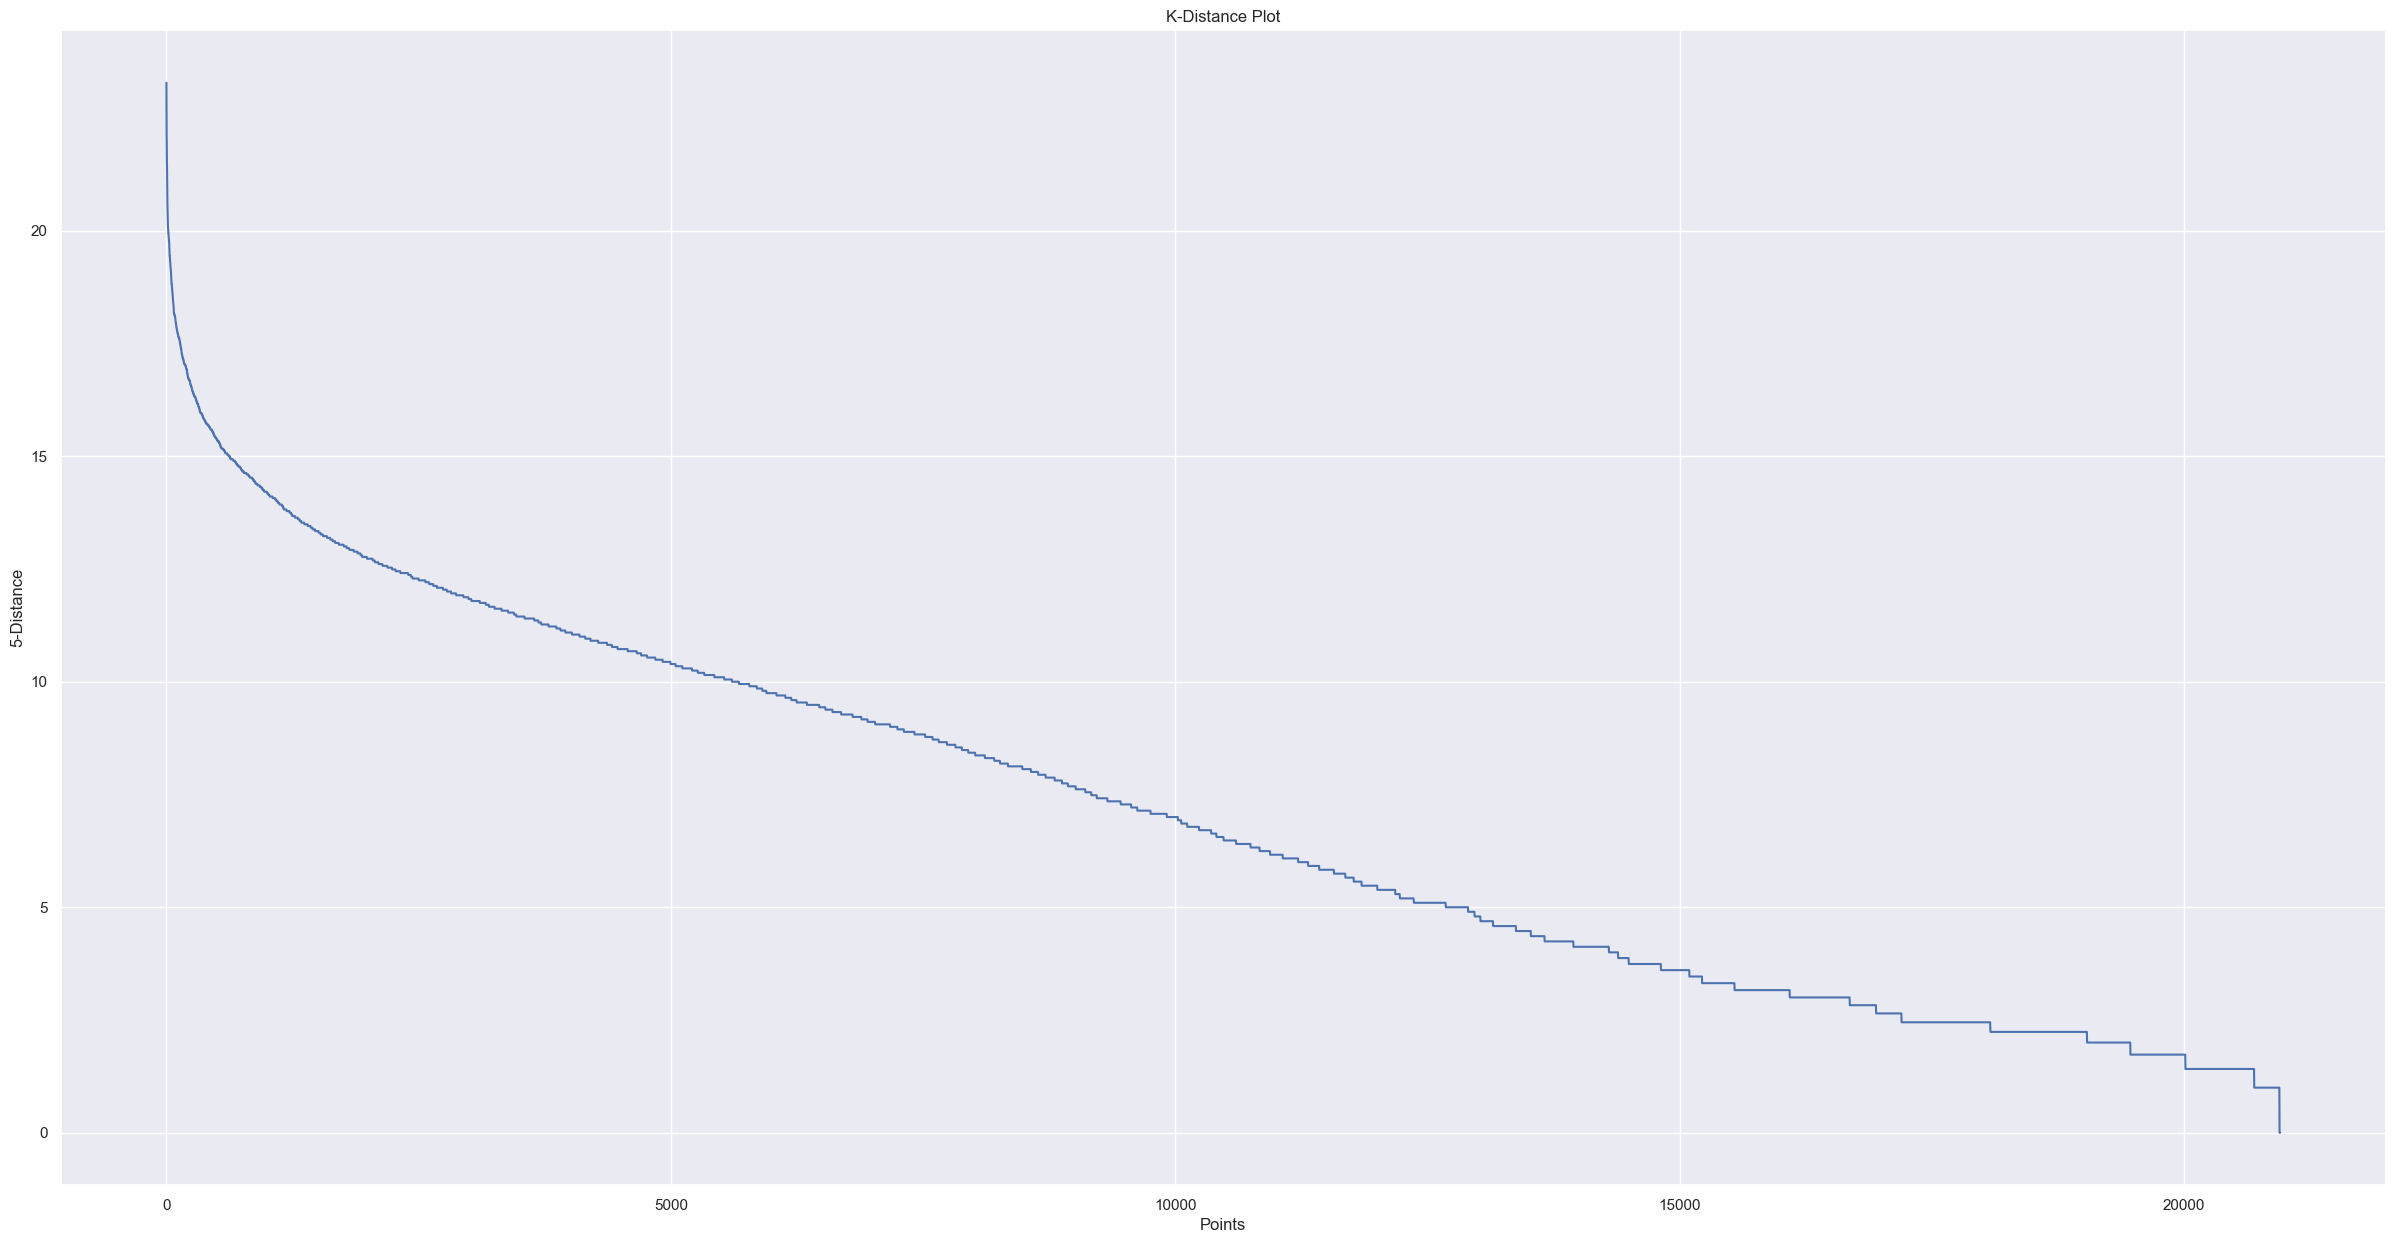

In [41]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import NearestNeighbors

# Create a NearestNeighbors object with a suitable value for k
k = 5
knn = NearestNeighbors(n_neighbors=k+1)  # Add 1 to include the point itself

# Fit the knn object to the data
knn.fit(df_feature)

# Compute the distances to the k-nearest neighbors
distances, _ = knn.kneighbors(df_feature)

# Sort the distances in descending order
distances = np.sort(distances[:, k], axis=0)[::-1]

# Plot the k-distance graph
plt.plot(np.arange(len(distances)), distances)
plt.xlabel('Points')
plt.ylabel(f'{k}-Distance')
plt.title('K-Distance Plot')
plt.show()


In [42]:
# Import the DBSCAN class from sklearn.cluster
from sklearn.cluster import DBSCAN

# Create a DBSCAN object with eps=1 and min_samples=5
dbscan = DBSCAN(eps=15, min_samples=5)

# Fit the DBSCAN object to the data
dbscan.fit(df_feature)

DBSCAN(eps=15)

In [43]:
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)